In [33]:
import numpy as np
import pandas as pd
import matplotlib as mp
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from statsmodels.tsa.stattools import acf

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/predictive_modelling/refs/heads/main/dataset_lm.csv')
df

,Dependent Var,Explanatory Var #1,Explanatory Var #2,Explanatory Var #3,Explanatory Var #4,Explanatory Var #5,Explanatory Var #6,Explanatory Var #7,Explanatory Var #8,Explanatory Var #9,Explanatory Var #10,Explanatory Var #11,Explanatory Var #12,Explanatory Var #13,Explanatory Var #14,Explanatory Var #15
0,56.293458,13.698667,50.639873,0,-18.568035,45.121911,11.412501,56.410757,2,-12.281132,38.996909,-3.010548,49.195073,0,-21.153143,46.919314
1,58.473431,2.714725,65.845845,1,-25.105932,47.190213,10.080280,65.383107,3,-36.763585,51.654939,4.991111,45.591729,0,-6.474403,53.383508
2,94.195330,11.618072,65.072497,0,-7.897464,52.163036,11.057301,82.812717,0,-15.733547,48.913837,-2.457696,56.608806,0,-27.903299,48.515026
3,29.074583,0.818623,45.408996,1,-18.316132,54.356714,5.029029,48.812471,1,-12.825591,45.851732,14.974177,47.362594,1,-10.064411,55.266254
4,86.035569,9.077544,73.548021,0,-19.204165,47.186807,12.128134,62.520911,2,-13.804860,47.765904,9.593982,53.700562,0,-17.546302,48.150543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,61.300432,0.338441,70.430598,0,-21.525979,50.741115,-8.050843,39.075397,3,-29.197173,57.473862,15.505202,73.280605,1,-3.602482,56.317474
418,26.309237,-1.729712,47.087996,1,-19.034807,55.242929,28.001769,76.429649,0,-21.941401,54.641620,14.295688,49.816798,1,-13.910494,52.827988
419,58.350627,18.322301,53.267835,0,-26.186201,36.702958,14.530116,51.275150,2,-20.699670,46.443687,5.708762,52.751016,1,-6.202345,52.467289
420,31.954003,0.436357,61.844132,0,-25.881961,57.106851,21.786066,68.928442,0,-23.166461,59.194840,8.365762,64.291056,1,-21.330017,50.237673


In [35]:
df.head()

,Dependent Var,Explanatory Var #1,Explanatory Var #2,Explanatory Var #3,Explanatory Var #4,Explanatory Var #5,Explanatory Var #6,Explanatory Var #7,Explanatory Var #8,Explanatory Var #9,Explanatory Var #10,Explanatory Var #11,Explanatory Var #12,Explanatory Var #13,Explanatory Var #14,Explanatory Var #15
0,56.293458,13.698667,50.639873,0,-18.568035,45.121911,11.412501,56.410757,2,-12.281132,38.996909,-3.010548,49.195073,0,-21.153143,46.919314
1,58.473431,2.714725,65.845845,1,-25.105932,47.190213,10.080280,65.383107,3,-36.763585,51.654939,4.991111,45.591729,0,-6.474403,53.383508
2,94.195330,11.618072,65.072497,0,-7.897464,52.163036,11.057301,82.812717,0,-15.733547,48.913837,-2.457696,56.608806,0,-27.903299,48.515026
3,29.074583,0.818623,45.408996,1,-18.316132,54.356714,5.029029,48.812471,1,-12.825591,45.851732,14.974177,47.362594,1,-10.064411,55.266254
4,86.035569,9.077544,73.548021,0,-19.204165,47.186807,12.128134,62.520911,2,-13.804860,47.765904,9.593982,53.700562,0,-17.546302,48.150543


In [36]:
df.columns

Index(['Dependent Var', 'Explanatory Var #1', 'Explanatory Var #2',
       'Explanatory Var #3', 'Explanatory Var #4', 'Explanatory Var #5',
       'Explanatory Var #6', 'Explanatory Var #7', 'Explanatory Var #8',
       'Explanatory Var #9', 'Explanatory Var #10', 'Explanatory Var #11',
       'Explanatory Var #12', 'Explanatory Var #13', 'Explanatory Var #14',
       'Explanatory Var #15'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dependent Var        422 non-null    float64
 1   Explanatory Var #1   422 non-null    float64
 2   Explanatory Var #2   422 non-null    float64
 3   Explanatory Var #3   422 non-null    int64  
 4   Explanatory Var #4   422 non-null    float64
 5   Explanatory Var #5   422 non-null    float64
 6   Explanatory Var #6   422 non-null    float64
 7   Explanatory Var #7   422 non-null    float64
 8   Explanatory Var #8   422 non-null    int64  
 9   Explanatory Var #9   422 non-null    float64
 10  Explanatory Var #10  422 non-null    float64
 11  Explanatory Var #11  422 non-null    float64
 12  Explanatory Var #12  422 non-null    float64
 13  Explanatory Var #13  422 non-null    int64  
 14  Explanatory Var #14  422 non-null    float64
 15  Explanatory Var #15  422 non-null    flo

## Part A: OLS Model

In [38]:
# Create the predictors and the target variable for the OLS Model
X = df.drop(columns=['Dependent Var'])  
y = df['Dependent Var']  

# Add a constant to the predictor variables (for the intercept)
X = sm.add_constant(X)

# Create and fit the OLS model
model_reg = sm.OLS(y, X).fit()

# Print the summary of the regression results
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.228e+30
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:48:21   Log-Likelihood:                 11955.
No. Observations:                 422   AIC:                        -2.388e+04
Df Residuals:                     406   BIC:                        -2.381e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   1.08e-13   2.98e+14      0.000      32.000      32.000
Explanatory Var #1      1.3000   8.68e-16    1.5e+15      0.000       1.300       1.300
Explanatory Var #2      1.7000   6.31e-16   2.69e+15      0.000       1.700       1.700
Explanatory Var #3      6.2000   1.21e-14   5.12e+14      0.000       6.200       6.200
Explanatory Var #4      2.1000   7.46e-16   2.82e+15      0.000       2.100       2.100
Explanatory Var #5     -0.9000   8.74e-16  -1.03e+15      0.000      -0.900      -0.900
Explanatory Var #6  -8.969e-16   5.27e-16     -1.701      0.090   -1.93e-15     1.4e-16
Explanatory Var #7    3.49e-17   4.07e-16      0.086      0.932   -7.66e-16    8.36e-16
Explanatory Var #8   8.068e-15   5.54e-15      1.457      0.146   -2.82e-15     1.9e-14
Explanatory Var #9   4.998e-16   7.08e-16      0.706      0.481   -8.92e-16    1.89e-15
Explanatory Var #10 -9.423e-16   8.82e-16     -1.068      0.286   -2.68e-15    7.92e-16
Explanatory Var #11  8.954e-16   8.53e-16      1.049      0.295   -7.82e-16    2.57e-15
Explanatory Var #12 -2.377e-16   6.38e-16     -0.372      0.710   -1.49e-15    1.02e-15
Explanatory Var #13  8.551e-15   1.22e-14      0.699      0.485   -1.55e-14    3.26e-14
Explanatory Var #14 -7.948e-16   7.51e-16     -1.059      0.290   -2.27e-15    6.81e-16
Explanatory Var #15 -3.688e-15   8.94e-16     -4.125      0.000   -5.45e-15   -1.93e-15
==============================================================================
Omnibus:                        8.569   Durbin-Watson:                   0.297
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                6.324
Skew:                          -0.184   Prob(JB):                       0.0423
Kurtosis:                       2.527   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Part B: Autocorrelation & GLS Model

Use error values from the OLS model to calculate their standard deviation and autocorrelation values for the first three lags.

Run the GLS Model accordingly

Correlation value between const and residuals: nan
Correlation value between Explanatory Var #1 and residuals: 0.26281900263551367
Correlation value between Explanatory Var #2 and residuals: 0.024233178241630515
Correlation value between Explanatory Var #3 and residuals: -0.025287300478545445
Correlation value between Explanatory Var #4 and residuals: -0.618120304353111
Correlation value between Explanatory Var #5 and residuals: 0.1581605022230408
Correlation value between Explanatory Var #6 and residuals: 0.1318894644503235
Correlation value between Explanatory Var #7 and residuals: 0.025391353993117916
Correlation value between Explanatory Var #8 and residuals: -0.143607808190813
Correlation value between Explanatory Var #9 and residuals: -0.08705950016925942
Correlation value between Explanatory Var #10 and residuals: 0.10455874314251357
Correlation value between Explanatory Var #11 and residuals: -0.07143976632283602
Correlation value between Explanatory Var #12 and residuals: -0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


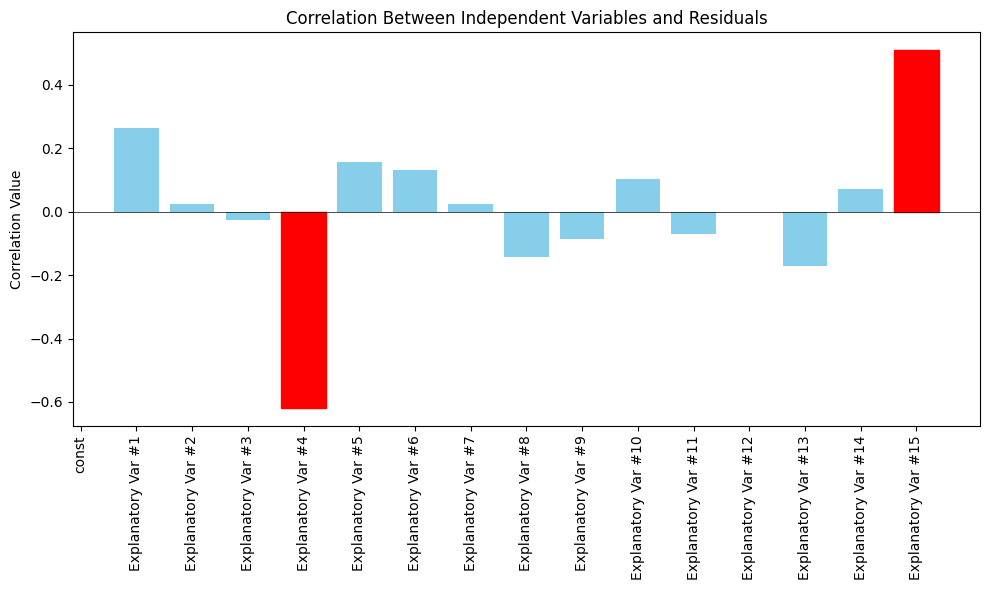

In [39]:
# Check to see if residuals are correlated to the explanatory variables 

epsilon = model_reg.resid
corr_results = []

for col in X.columns:
    corr = np.corrcoef(X[col], epsilon)[0,1]
    corr_results.append({'Variable': col, 'Correlation': corr})
    print(f'Correlation value between {col} and residuals: {corr}')

corr_df = pd.DataFrame(corr_results)

#Plotting the values to have a more comprehensive visual on the individual variables that are moderately correlated with the residuals

plt.figure(figsize=(10, 6))
bars = plt.bar(corr_df['Variable'], corr_df['Correlation'], color='skyblue')

# Highlight bars where correlation is moderate to high (absolute value > 0.5)
for bar, value in zip(bars, corr_df['Correlation']):
    if not np.isnan(value) and abs(value) > 0.5:
        bar.set_color('red')

# Adding labels and title
plt.axhline(0, color='black', linewidth=0.5)
plt.xticks(rotation=90)
plt.title('Correlation Between Independent Variables and Residuals')
plt.ylabel('Correlation Value')

# Show plot
plt.tight_layout()
plt.show()

It seems some variables are observed to have a moderate correlation with the error terms

In [40]:
# Using the error values from the OLS model to calculate their standard deviation and autocorrelation for the first three lags

print("Autocorrelation and Standard Deviation values for the first 3 lags:")

# Loop through first 3 lags
for lag in range(1, 4):
    # Calculate autocorrelation for each lag
    autocorrelation_values = epsilon.autocorr(lag=lag)
    
    # Calculate standard deviation for residuals at each lag
    std_residuals = np.std(epsilon.shift(lag).dropna())  

    # Print the results
    print(f'Lag {lag}:')
    print(f'    Autocorrelation: {autocorrelation_values}')
    print(f'    Standard Deviation: {std_residuals}')

Autocorrelation and Standard Deviation values for the first 3 lags:
Lag 1:
    Autocorrelation: 0.10417605427712472
    Standard Deviation: 4.908093575110467e-14
Lag 2:
    Autocorrelation: -0.016275206486095383
    Standard Deviation: 4.901710557988271e-14
Lag 3:
    Autocorrelation: 0.02473461878576162
    Standard Deviation: 4.902351116202997e-14


In [41]:
# Generate autocorrelated error terms based on the residuals
epsilon_autocorrelated = np.zeros(len(epsilon))
rho = 0.104  #Utilizing the autocorrelation value from the first lag

# Apply autocorrelation on residuals (epsilon)
epsilon_autocorrelated[0] = epsilon[0]
for i in range(1, len(epsilon)):
    epsilon_autocorrelated[i] = rho * epsilon_autocorrelated[i-1] + epsilon[i]

y_new = 3 + 4 * X.iloc[:, 1] + epsilon_autocorrelated  

model_with_autocorr = sm.OLS(y_new, X).fit()

model_with_autocorr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Explanatory Var #1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.632e+29
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:48:21   Log-Likelihood:                 11492.
No. Observations:                 422   AIC:                        -2.295e+04
Df Residuals:                     406   BIC:                        -2.289e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.0000   3.22e-13   9.31e+12      0.000       3.000       3.000
Explanatory Var #1      4.0000    2.6e-15   1.54e+15      0.000       4.000       4.000
Explanatory Var #2   1.534e-16   1.89e-15      0.081      0.935   -3.56e-15    3.87e-15
Explanatory Var #3   4.535e-15   3.63e-14      0.125      0.901   -6.68e-14    7.59e-14
Explanatory Var #4  -2.677e-15   2.23e-15     -1.198      0.232   -7.07e-15    1.72e-15
Explanatory Var #5   2.637e-15   2.62e-15      1.007      0.314   -2.51e-15    7.79e-15
Explanatory Var #6   1.174e-15   1.58e-15      0.743      0.458   -1.93e-15    4.28e-15
Explanatory Var #7   6.787e-16   1.22e-15      0.556      0.579   -1.72e-15    3.08e-15
Explanatory Var #8  -6.994e-15   1.66e-14     -0.421      0.674   -3.96e-14    2.56e-14
Explanatory Var #9  -5.867e-16   2.12e-15     -0.277      0.782   -4.76e-15    3.58e-15
Explanatory Var #10   2.36e-15   2.64e-15      0.893      0.373   -2.84e-15    7.56e-15
Explanatory Var #11 -1.034e-16   2.56e-15     -0.040      0.968   -5.13e-15    4.92e-15
Explanatory Var #12  -2.04e-15   1.91e-15     -1.066      0.287    -5.8e-15    1.72e-15
Explanatory Var #13 -2.021e-15   3.66e-14     -0.055      0.956   -7.41e-14       7e-14
Explanatory Var #14 -4.815e-16   2.25e-15     -0.214      0.831    -4.9e-15    3.94e-15
Explanatory Var #15  2.612e-15   2.68e-15      0.975      0.330   -2.66e-15    7.88e-15
==============================================================================
Omnibus:                        1.769   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.808
Skew:                           0.115   Prob(JB):                        0.405
Kurtosis:                       2.777   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Generate the GLS Model

# Using Autocorrelation value of the first lag 
rho = 0.104  
sigma = np.std(epsilon)

# Build the covariance matrix using the Toeplitz structure
# This is a simplistic structure; you may adjust based on your model
cov_matrix = sigma ** 2 * toeplitz(np.append([1, rho], np.zeros(len(epsilon) - 2)))

# Now fit the GLS model
X_GLS = sm.add_constant(X)  # Add constant term to the model if not already present
model_gls = sm.GLS(y_new, X_GLS, sigma=cov_matrix)
results_gls = model_gls.fit()

# Output the GLS model summary
results_gls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:     Explanatory Var #1   R-squared:                       1.000
Model:                            GLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.182e+30
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:48:21   Log-Likelihood:                 11908.
No. Observations:                 422   AIC:                        -2.378e+04
Df Residuals:                     406   BIC:                        -2.372e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.0000    1.2e-13    2.5e+13      0.000       3.000       3.000
Explanatory Var #1      4.0000   9.66e-16   4.14e+15      0.000       4.000       4.000
Explanatory Var #2  -1.703e-15   7.05e-16     -2.414      0.016   -3.09e-15   -3.16e-16
Explanatory Var #3   1.225e-14   1.34e-14      0.912      0.362   -1.42e-14    3.87e-14
Explanatory Var #4  -1.865e-15   8.32e-16     -2.241      0.026    -3.5e-15   -2.29e-16
Explanatory Var #5  -2.889e-16   9.81e-16     -0.294      0.769   -2.22e-15    1.64e-15
Explanatory Var #6   5.333e-16   5.87e-16      0.908      0.364   -6.21e-16    1.69e-15
Explanatory Var #7  -4.189e-16   4.54e-16     -0.922      0.357   -1.31e-15    4.74e-16
Explanatory Var #8  -5.173e-15   6.17e-15     -0.838      0.402   -1.73e-14    6.96e-15
Explanatory Var #9   2.919e-16   7.87e-16      0.371      0.711   -1.26e-15    1.84e-15
Explanatory Var #10  5.187e-16   9.76e-16      0.532      0.595    -1.4e-15    2.44e-15
Explanatory Var #11 -1.119e-15   9.49e-16     -1.179      0.239   -2.98e-15    7.47e-16
Explanatory Var #12  1.012e-16   7.07e-16      0.143      0.886   -1.29e-15    1.49e-15
Explanatory Var #13  4.578e-15   1.35e-14      0.340      0.734   -2.19e-14    3.11e-14
Explanatory Var #14  1.103e-15   8.36e-16      1.319      0.188   -5.41e-16    2.75e-15
Explanatory Var #15  3.302e-15   9.85e-16      3.352      0.001    1.37e-15    5.24e-15
==============================================================================
Omnibus:                        1.090   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                0.931
Skew:                           0.109   Prob(JB):                        0.628
Kurtosis:                       3.076   Cond. No.                     2.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Part C: The Lasso Model

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=42)

Lasso Modelling done without any feature scaling

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_percentage_error

# Step 2: Run the Lasso model with alpha=1 and estimate the coefficients using the training set
lasso = Lasso(alpha=1, random_state=42)
lasso.fit(X_train, y_train)

# Get the coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

print("Coefficients estimated by the Lasso model with alpha=1:")
print(coefficients)

# Step 3: Calculate the Mean Absolute Percentage Error using the test set
y_pred = lasso.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Multiply by 100 to get percentage

print(f"\nMean Absolute Percentage Error (MAPE) on the test set: {mape:.2f}%")

# Step 4: Find an approximate value for alpha that minimizes the MAPE
# We'll use cross-validation to test different alpha values

from sklearn.linear_model import LassoCV

# Define a range of alpha values to test
alpha_values = np.logspace(-4, 1, 50)

# Initialize LassoCV to find the best alpha
lasso_cv = LassoCV(alphas=alpha_values, cv=5, random_state=42)

# Fit the model
lasso_cv.fit(X_train, y_train)

# Best alpha value
best_alpha = lasso_cv.alpha_
print(f"\nOptimal alpha value that minimizes MAPE: {best_alpha}")

# Train the Lasso model with the optimal alpha
lasso_optimal = Lasso(alpha=best_alpha, random_state=42)
lasso_optimal.fit(X_train, y_train)

# Predict and calculate MAPE
y_pred_optimal = lasso_optimal.predict(X_test)
mape_optimal = mean_absolute_percentage_error(y_test, y_pred_optimal) * 100

print(f"\nMAPE with optimal alpha ({best_alpha}): {mape_optimal:.2f}%")

Coefficients estimated by the Lasso model with alpha=1:
                Feature  Coefficient
0                 const     0.000000
1    Explanatory Var #1     1.269726
2    Explanatory Var #2     1.683946
3    Explanatory Var #3     2.026262
4    Explanatory Var #4     2.087565
5    Explanatory Var #5    -0.917464
6    Explanatory Var #6    -0.000000
7    Explanatory Var #7     0.000000
8    Explanatory Var #8    -0.000000
9    Explanatory Var #9     0.000000
10  Explanatory Var #10    -0.000000
11  Explanatory Var #11     0.013142
12  Explanatory Var #12     0.000000
13  Explanatory Var #13    -0.000000
14  Explanatory Var #14     0.000000
15  Explanatory Var #15    -0.036177

Mean Absolute Percentage Error (MAPE) on the test set: 4.43%

Optimal alpha value that minimizes MAPE: 0.0001

MAPE with optimal alpha (0.0001): 0.00%


Lasso Modelling Done with Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Run the Lasso model with alpha=1 and estimate the coefficients using the training set
lasso = Lasso(alpha=1, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Get the coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

print("Coefficients estimated by the Lasso model with alpha=1:")
print(coefficients)

# Step 3: Calculate the Mean Absolute Percentage Error using the test set
y_pred = lasso.predict(X_test_scaled)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Multiply by 100 to get percentage

print(f"\nMean Absolute Percentage Error (MAPE) on the test set: {mape:.2f}%")

# Step 4: Find an approximate value for alpha that minimizes the MAPE
# We'll use cross-validation to test different alpha values

from sklearn.linear_model import LassoCV

# Define a range of alpha values to test
alpha_values = np.logspace(-4, 1, 50)

# Initialize LassoCV to find the best alpha
lasso_cv = LassoCV(alphas=alpha_values, cv=5, random_state=42)

# Fit the model
lasso_cv.fit(X_train_scaled, y_train)

# Best alpha value
best_alpha = lasso_cv.alpha_
print(f"\nOptimal alpha value that minimizes MAPE: {best_alpha}")

# Train the Lasso model with the optimal alpha
lasso_optimal = Lasso(alpha=best_alpha, random_state=42)
lasso_optimal.fit(X_train_scaled, y_train)

# Predict and calculate MAPE
y_pred_optimal = lasso_optimal.predict(X_test_scaled)
mape_optimal = mean_absolute_percentage_error(y_test, y_pred_optimal) * 100

print(f"\nMAPE with optimal alpha ({best_alpha}): {mape_optimal:.2f}%")

Coefficients estimated by the Lasso model with alpha=1:
                Feature  Coefficient
0                 const     0.000000
1    Explanatory Var #1     8.085504
2    Explanatory Var #2    15.751859
3    Explanatory Var #3     2.171211
4    Explanatory Var #4    16.303135
5    Explanatory Var #5    -5.216422
6    Explanatory Var #6    -0.000000
7    Explanatory Var #7    -0.000000
8    Explanatory Var #8    -0.000000
9    Explanatory Var #9     0.000000
10  Explanatory Var #10    -0.000000
11  Explanatory Var #11     0.000000
12  Explanatory Var #12     0.000000
13  Explanatory Var #13    -0.000000
14  Explanatory Var #14    -0.000000
15  Explanatory Var #15    -0.000000

Mean Absolute Percentage Error (MAPE) on the test set: 5.16%

Optimal alpha value that minimizes MAPE: 0.0001

MAPE with optimal alpha (0.0001): 0.00%


## Part D: Forecasting Model

Since Lasso regularization is primarily used when you have multiple feature variables and you want to perform feature selection on them, while Ridge L2 regularization is used to help prevent overfitting by penalizing larger coefficients, it would make the most sense for us to use Ridge regularization in this case since we only have one primary feature of "Advanced Demand" which we are using to predict the "Actual Demand". 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

In [48]:
# Here we convert the table into a dataset
df = {
    'Month': np.arange(1, 26),
    'Demand': [100, 112, 107, 103, 91, 85, 84, 85, 79, 81, 134, 86, 99, 115, 81, 114, 116, 163, 143, 193, 144, 202, 158, 160, 144],
    'Advance_demand': [71, 30, 75, 64, 41, 51, 42, 57, 57, 49, 134, 52, 99, 56, 81, 79, 73, 163, 193, 99, 91, 202, 105, 101, 96]
}

In [49]:
# We check to see whether the table we created is accurate to the table given in the question
df = pd.DataFrame(df)
df

,Month,Demand,Advance_demand
0,1,100,71
1,2,112,30
2,3,107,75
3,4,103,64
4,5,91,41
5,6,85,51
6,7,84,42
7,8,85,57
8,9,79,57
9,10,81,49


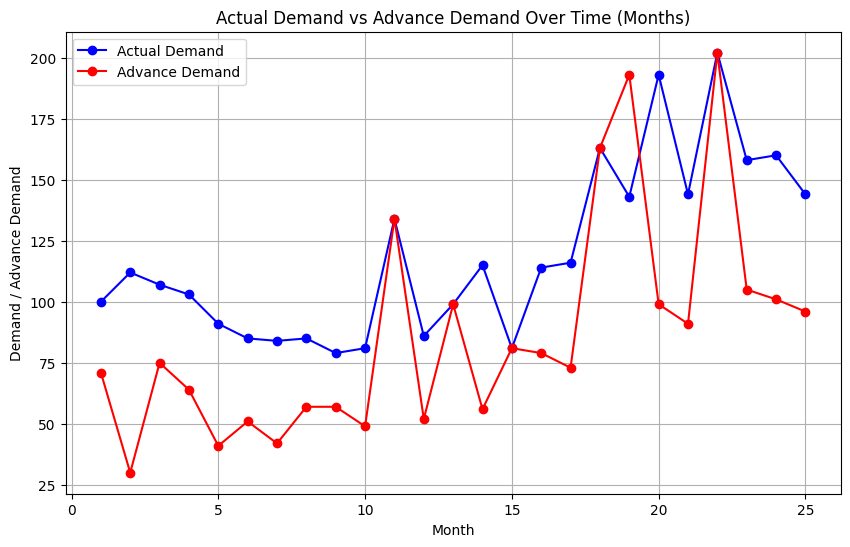

In [50]:
# Line plot of both actual and advanced demand
plt.figure(figsize=(10,6))
plt.plot(df['Month'], df['Demand'], color='blue', marker='o', label='Actual Demand')
plt.plot(df['Month'], df['Advance_demand'], color='red', marker='o', label='Advance Demand')
plt.xlabel('Month')
plt.ylabel('Demand / Advance Demand')
plt.title('Actual Demand vs Advance Demand Over Time (Months)')
plt.grid(True)
plt.legend()
plt.show()

In [51]:
# we setup the features and target variables and split the data
X = df[['Advance_demand']]
y = df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Here we initialize and fit the Ridge regression model

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [53]:
ridge_preds = ridge_model.predict(X_test)

In [54]:
# Then evaluate the model through the RMSE

ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(ridge_mse)

In [55]:
ridge_rmse

19.869757857588905

In [56]:
# In order to plot the actual vs predicted demand we need to sort the test data first 

sorted_idx = np.argsort(X_test['Advance_demand'].values)
X_test_sorted = X_test['Advance_demand'].values[sorted_idx]
y_test_sorted = y_test.values[sorted_idx]
ridge_preds_sorted = ridge_preds[sorted_idx]

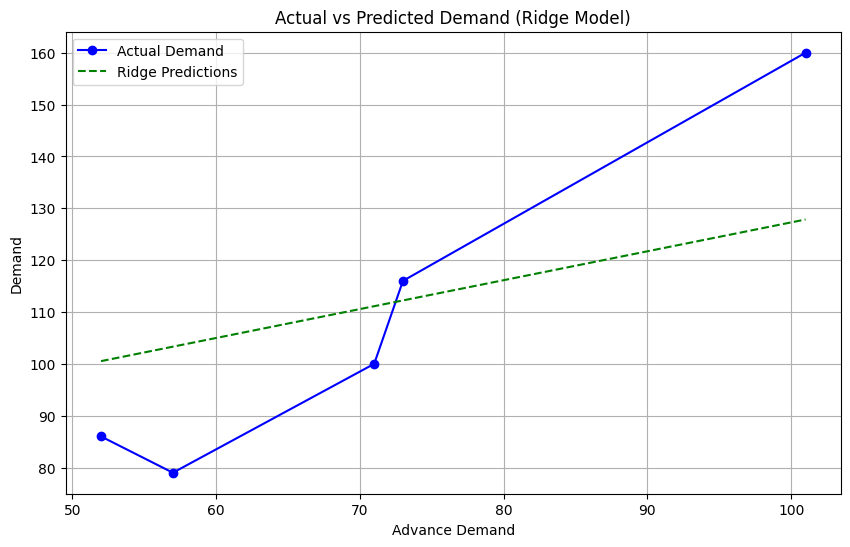

In [57]:
# Line Plot of Actual vs Predicted Demand (for Ridge)
plt.figure(figsize=(10,6))
plt.plot(X_test_sorted, y_test_sorted, color='blue', marker='o', label='Actual Demand')
plt.plot(X_test_sorted, ridge_preds_sorted, color='green', linestyle='--', label='Ridge Predictions')
plt.xlabel('Advance Demand')
plt.ylabel('Demand')
plt.title('Actual vs Predicted Demand (Ridge Model)')
plt.grid(True)
plt.legend()
plt.show()

In [58]:
# Summary of results for Ridge Regularization model

ridge_results = {
    'Ridge RMSE': ridge_rmse,
    'Ridge Coefficient': ridge_model.coef_,
    'Ridge Intercept': ridge_model.intercept_
}

ridge_results

{'Ridge RMSE': 19.869757857588905,
 'Ridge Coefficient': array([0.55744378]),
 'Ridge Intercept': 71.53495471659713}

Now that we've completed the forecasting using the Ridge regularization method, we can add some additional constraints where predicted demand cannot be lower than the advance demand which is a realistic business demand. This way we can create our own customized enhanced regularization method to create the optimal forecasting model. 

In [59]:
# New Step: Custom loss function with penalty for predicted demand < advance demand
def custom_loss_function(params, X, y, advance_demand):
    ridge_model = Ridge(alpha=params[0])  # Alpha (regularization strength) is the first parameter
    ridge_model.fit(X, y)
    predictions = ridge_model.predict(X)
    
    # Calculate MSE (Mean Squared Error)
    mse = mean_squared_error(y, predictions)
    
    # Custom penalty: Add a penalty when predicted demand < advance demand
    penalty = np.sum(np.maximum(advance_demand - predictions, 0))  # Penalty for violating the constraint
    
    # Combine MSE and the penalty. The second parameter in 'params' is the penalty weight (lambda).
    return mse + params[1] * penalty

In [60]:
# Optimize regularization (alpha) and penalty weight (lambda) with constraints
initial_params = [1.0, 0.1]  # Initial guess for alpha (Ridge) and lambda (penalty weight)
bounds = [(0, None), (0, None)]  # Alpha and lambda should both be non-negative

In [61]:
# Run the optimization with bounds
result = minimize(custom_loss_function, initial_params, args=(X_train, y_train, X_train['Advance_demand']), bounds=bounds)

In [62]:
# Optimal alpha and lambda found from optimization
optimal_alpha = result.x[0]  # Optimized Ridge regularization parameter (alpha)
optimal_lambda = result.x[1]  # Optimized penalty weight (lambda)

In [63]:
# Refit the Ridge model with the optimized alpha
ridge_model = Ridge(alpha=optimal_alpha)
ridge_model.fit(X_train, y_train)


enhanced_ridge_preds = ridge_model.predict(X_test)
enhanced_ridge_rmse = np.sqrt(mean_squared_error(y_test, enhanced_ridge_preds))

In [64]:
# Here we make new predictions based off the new optimal model
enhanced_ridge_preds = ridge_model.predict(X_test)
enhanced_ridge_rmse = np.sqrt(mean_squared_error(y_test, enhanced_ridge_preds))

In [65]:
# Summary of optimal Ridge model results
print("Enhanced Ridge Model with Penalty:")
print(f"Optimal Alpha: {optimal_alpha}")
print(f"Optimal Lambda: {optimal_lambda}")
print(f"RMSE: {enhanced_ridge_rmse}")
print(f"Coefficient: {ridge_model.coef_}")
print(f"Intercept: {ridge_model.intercept_}")

Enhanced Ridge Model with Penalty:
Optimal Alpha: 0.9996475708593326
Optimal Lambda: 0.0
RMSE: 19.8697577771071
Coefficient: [0.55744378]
Intercept: 71.5349543281543


In [66]:
# Next we plot the enhanced Ridge model but first we need to smooth the prediction plotting line

sorted_idx = np.argsort(X_test['Advance_demand'].values)
X_test_sorted = X_test['Advance_demand'].values[sorted_idx]
y_test_sorted = y_test.values[sorted_idx]
enhanced_ridge_preds_sorted = enhanced_ridge_preds[sorted_idx]

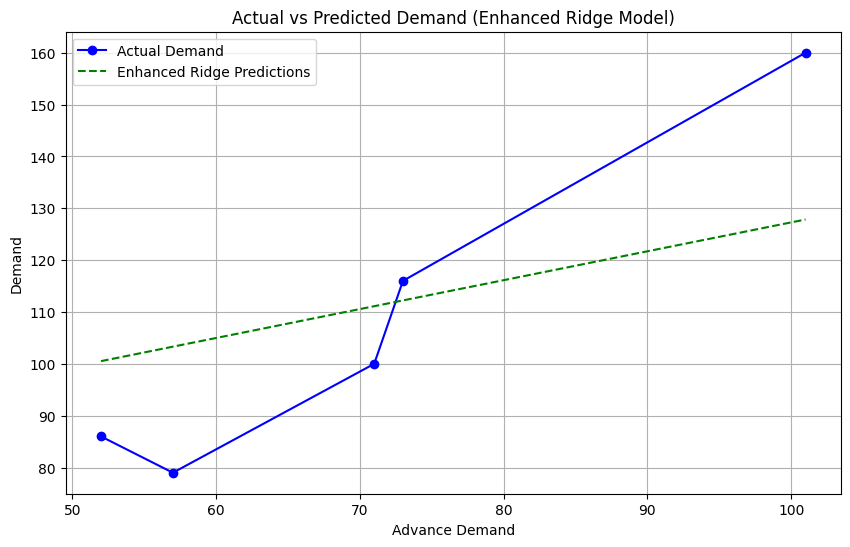

In [67]:
# Line Plot of Actual vs Predicted Demand (for the Enhanced Ridge Model)
plt.figure(figsize=(10,6))
plt.plot(X_test_sorted, y_test_sorted, color='blue', marker='o', label='Actual Demand')
plt.plot(X_test_sorted, enhanced_ridge_preds_sorted, color='green', linestyle='--', label='Enhanced Ridge Predictions')
plt.xlabel('Advance Demand')
plt.ylabel('Demand')
plt.title('Actual vs Predicted Demand (Enhanced Ridge Model)')
plt.grid(True)
plt.legend()
plt.show()